In [378]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [379]:
df = pd.read_csv('/Users/liuluyan/Desktop/dataset_7.csv')

In [380]:
df.head()

,Location,date_time_local,temperature,room_temperature,heater,CO2_level,airflow,humidity,spray,light,Plant,plant_stage,light_spectrum,Nutrition_load,date_planted,fertilizer,water_consumption,energy_consumption
0,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,Asian mustard greens,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,168.969690
1,Montreal,2022-11-23 16:00:00,0.0,22.672561,0,700.37,high,51,0,1,Pea shoots,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,183.050498
2,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,Mizuna,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,168.969690
3,Montreal,2022-11-23 16:00:00,0.0,22.672561,0,700.37,high,51,0,1,Micro radish,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,183.050498
4,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,Pak choi,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,168.969690


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131385 entries, 0 to 131384
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Location            131385 non-null  object 
 1   date_time_local     131385 non-null  object 
 2   temperature         131385 non-null  float64
 3   room_temperature    131385 non-null  float64
 4   heater              131385 non-null  int64  
 5   CO2_level           131385 non-null  float64
 6   airflow             131385 non-null  object 
 7   humidity            131385 non-null  int64  
 8   spray               131385 non-null  int64  
 9   light               131385 non-null  int64  
 10  Plant               131385 non-null  object 
 11  plant_stage         131385 non-null  object 
 12  light_spectrum      131385 non-null  object 
 13  Nutrition_load      131385 non-null  object 
 14  date_planted        131385 non-null  int64  
 15  fertilizer          131385 non-nul

In [382]:
df.drop_duplicates()

,Location,date_time_local,temperature,room_temperature,heater,CO2_level,airflow,humidity,spray,light,Plant,plant_stage,light_spectrum,Nutrition_load,date_planted,fertilizer,water_consumption,energy_consumption
0,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,Asian mustard greens,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,168.969690
1,Montreal,2022-11-23 16:00:00,0.0,22.672561,0,700.37,high,51,0,1,Pea shoots,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,183.050498
2,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,Mizuna,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,168.969690
3,Montreal,2022-11-23 16:00:00,0.0,22.672561,0,700.37,high,51,0,1,Micro radish,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,183.050498
4,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,Pak choi,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,168.969690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131380,Montreal,2023-11-23 14:00:00,4.3,21.559674,1,816.39,mid,69,0,1,Micro broccoli,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,197.131305
131381,Calgary,2023-11-23 14:00:00,0.7,20.475305,0,481.81,high,54,0,1,Kohlrabi,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,183.050498
131382,Guelph,2023-11-23 14:00:00,4.6,22.455731,0,950.60,low,60,0,1,Ice lettuce,Vegetation,B,0.8-1.0 mS/cm,1205,0,0,154.888882
131383,Guelph,2023-11-23 14:00:00,4.6,22.455731,0,950.60,low,60,0,1,Baby spinach,Vegetation,B,0.8-1.0 mS/cm,1205,0,0,154.888882


In [383]:
df.dropna()

,Location,date_time_local,temperature,room_temperature,heater,CO2_level,airflow,humidity,spray,light,Plant,plant_stage,light_spectrum,Nutrition_load,date_planted,fertilizer,water_consumption,energy_consumption
0,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,Asian mustard greens,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,168.969690
1,Montreal,2022-11-23 16:00:00,0.0,22.672561,0,700.37,high,51,0,1,Pea shoots,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,183.050498
2,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,Mizuna,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,168.969690
3,Montreal,2022-11-23 16:00:00,0.0,22.672561,0,700.37,high,51,0,1,Micro radish,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,183.050498
4,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,Pak choi,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,168.969690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131380,Montreal,2023-11-23 14:00:00,4.3,21.559674,1,816.39,mid,69,0,1,Micro broccoli,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,197.131305
131381,Calgary,2023-11-23 14:00:00,0.7,20.475305,0,481.81,high,54,0,1,Kohlrabi,Vegetation,B,0.8-1.0 mS/cm,1127,0,0,183.050498
131382,Guelph,2023-11-23 14:00:00,4.6,22.455731,0,950.60,low,60,0,1,Ice lettuce,Vegetation,B,0.8-1.0 mS/cm,1205,0,0,154.888882
131383,Guelph,2023-11-23 14:00:00,4.6,22.455731,0,950.60,low,60,0,1,Baby spinach,Vegetation,B,0.8-1.0 mS/cm,1205,0,0,154.888882


In [384]:
def average_range(range_str):
    try:
        # Extract numbers and convert them to float
        numbers = [float(num) for num in range_str.replace(' mS/cm', '').split('-')]
        # Return the average
        return sum(numbers) / len(numbers)
    except:
        # Handle unexpected formats
        return None

df['Nutrition_load'] = df['Nutrition_load'].apply(average_range)

In [385]:
df

,Location,date_time_local,temperature,room_temperature,heater,CO2_level,airflow,humidity,spray,light,Plant,plant_stage,light_spectrum,Nutrition_load,date_planted,fertilizer,water_consumption,energy_consumption
0,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,Asian mustard greens,Vegetation,B,0.9,1127,0,0,168.969690
1,Montreal,2022-11-23 16:00:00,0.0,22.672561,0,700.37,high,51,0,1,Pea shoots,Vegetation,B,0.9,1127,0,0,183.050498
2,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,Mizuna,Vegetation,B,0.9,1127,0,0,168.969690
3,Montreal,2022-11-23 16:00:00,0.0,22.672561,0,700.37,high,51,0,1,Micro radish,Vegetation,B,0.9,1127,0,0,183.050498
4,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,Pak choi,Vegetation,B,0.9,1127,0,0,168.969690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131380,Montreal,2023-11-23 14:00:00,4.3,21.559674,1,816.39,mid,69,0,1,Micro broccoli,Vegetation,B,0.9,1127,0,0,197.131305
131381,Calgary,2023-11-23 14:00:00,0.7,20.475305,0,481.81,high,54,0,1,Kohlrabi,Vegetation,B,0.9,1127,0,0,183.050498
131382,Guelph,2023-11-23 14:00:00,4.6,22.455731,0,950.60,low,60,0,1,Ice lettuce,Vegetation,B,0.9,1205,0,0,154.888882
131383,Guelph,2023-11-23 14:00:00,4.6,22.455731,0,950.60,low,60,0,1,Baby spinach,Vegetation,B,0.9,1205,0,0,154.888882


In [386]:
grouped = df.groupby('Location')

In [387]:
df['date_time_local'] = pd.to_datetime(df['date_time_local'].str[:-4], infer_datetime_format=True)
df['year'] = df['date_time_local'].dt.year
df['month'] = df['date_time_local'].dt.month
df['day'] = df['date_time_local'].dt.day
df['hour'] = df['date_time_local'].dt.hour
df = df.drop(columns=['date_time_local'])

/var/folders/6s/4g4hpj2j19lb81vjy9n25sjr0000gn/T/ipykernel_97842/3069474627.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_time_local'] = pd.to_datetime(df['date_time_local'].str[:-4], infer_datetime_format=True)


In [388]:
df1 = grouped.get_group('Calgary')  # For Calgary
df2 = grouped.get_group('Montreal')  # For Montreal
df3 = grouped.get_group('Guelph')  # Replace 'AnotherLocation' with the actual name
df4 = df1.copy()

In [389]:
df1

,Location,date_time_local,temperature,room_temperature,heater,CO2_level,airflow,humidity,spray,light,...,light_spectrum,Nutrition_load,date_planted,fertilizer,water_consumption,energy_consumption,year,month,day,hour
0,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,...,B,0.9,1127,0,0,168.969690,2022,11,23,16
2,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,...,B,0.9,1127,0,0,168.969690,2022,11,23,16
4,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,...,B,0.9,1127,0,0,168.969690,2022,11,23,16
6,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,...,B,0.9,1127,0,0,168.969690,2022,11,23,16
14,Calgary,2022-11-23 16:00:00,5.7,21.555731,1,767.79,low,56,0,1,...,B,0.9,1127,0,0,168.969690,2022,11,23,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131372,Calgary,2023-11-23 14:00:00,0.7,20.475305,0,481.81,high,54,0,1,...,B,0.9,1127,0,0,183.050498,2023,11,23,14
131375,Calgary,2023-11-23 14:00:00,0.7,20.475305,0,481.81,high,54,0,1,...,B,0.9,1127,0,0,183.050498,2023,11,23,14
131376,Calgary,2023-11-23 14:00:00,0.7,20.475305,0,481.81,high,54,0,1,...,B,0.9,1127,0,0,183.050498,2023,11,23,14
131379,Calgary,2023-11-23 14:00:00,0.7,20.475305,0,481.81,high,54,0,1,...,B,0.9,1205,0,0,183.050498,2023,11,23,14


In [390]:
df1.drop(['light_spectrum','Location','airflow','Plant','plant_stage'], axis=1, inplace=True)

/var/folders/6s/4g4hpj2j19lb81vjy9n25sjr0000gn/T/ipykernel_97842/3370478877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['light_spectrum','Location','airflow','Plant','plant_stage'], axis=1, inplace=True)


In [391]:
df1['day_of_year'] = df1['date_time_local'].dt.dayofyear

# Group by day of the year and calculate the average for each day in the copied DataFrame
daily_avg = df1.groupby('day_of_year').mean()[['temperature', 'room_temperature', 'energy_consumption']]



/var/folders/6s/4g4hpj2j19lb81vjy9n25sjr0000gn/T/ipykernel_97842/1770976395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day_of_year'] = df1['date_time_local'].dt.dayofyear


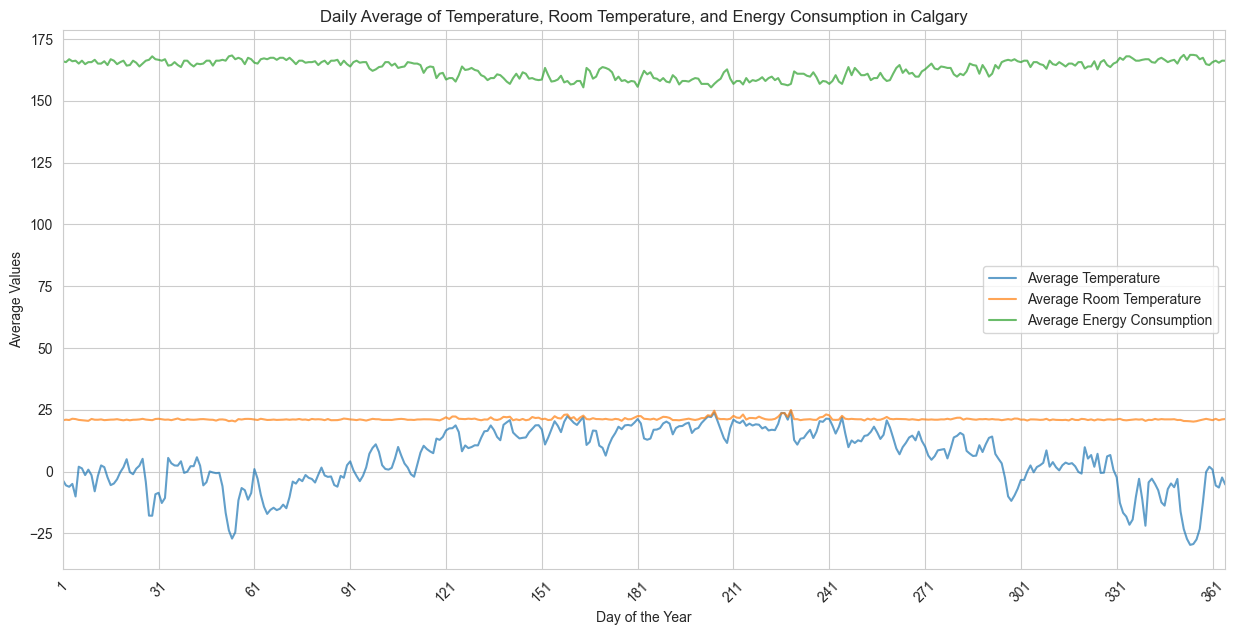

In [392]:
plt.figure(figsize=(15, 7))

# Line plot for each variable
plt.plot(daily_avg['temperature'], label='Average Temperature', alpha=0.7)
plt.plot(daily_avg['room_temperature'], label='Average Room Temperature', alpha=0.7)
plt.plot(daily_avg['energy_consumption'], label='Average Energy Consumption', alpha=0.7)

plt.title('Daily Average of Temperature, Room Temperature, and Energy Consumption in Calgary')
plt.xlabel('Day of the Year')
plt.ylabel('Average Values')
plt.xlim(1, 365)
plt.xticks(range(1, 366, 30), rotation=45)
plt.legend()
plt.grid(True)
plt.show()

The graph provided appears to represent data relevant to crop growth conditions in an indoor setting, such as a greenhouse, in Calgary over a year. Here's a more focused analysis considering this context:

- Average Temperature (blue line): The outdoor temperature varies considerably, which is typical for Calgary's climate. The crop growth could be indirectly affected by the outdoor temperature as it may influence the heating requirements of the greenhouse and possibly the behavior of pests and diseases.

- Average Room Temperature (orange line): The indoor room temperature is kept quite constant, as indicated by the flat line. This suggests that the conditions for crop growth are maintained at an optimal level throughout the year, regardless of outdoor temperature fluctuations. This stable room temperature is crucial for ensuring consistent crop growth and development.

- Average Energy Consumption (green line): The energy consumption shows little fluctuation, maintaining a slightly increasing trend towards the end of the year. Given that the room temperature is constant, the increase in energy consumption could be associated with supplemental lighting during shorter days in the winter months or additional heating requirements due to colder external temperatures. It could also indicate the growth cycles of the crops, with different stages requiring varying amounts of energy input, such as germination, vegetative growth, flowering, and fruiting.

The consistency in room temperature despite the varying outdoor temperature suggests a well-controlled environment, possibly using automated climate control systems that regulate heating, cooling, and insulation. The energy consumption pattern implies that the system may have been optimized to reduce variation in energy use, which could be a result of energy-efficient practices or technology.

Understanding these dynamics is critical for growers, as it can help optimize energy use and potentially reduce costs. It can also contribute to the planning of crop cycles and the selection of crop varieties that are best suited to these indoor conditions. Moreover, it could assist in predicting yields and planning for market supply.

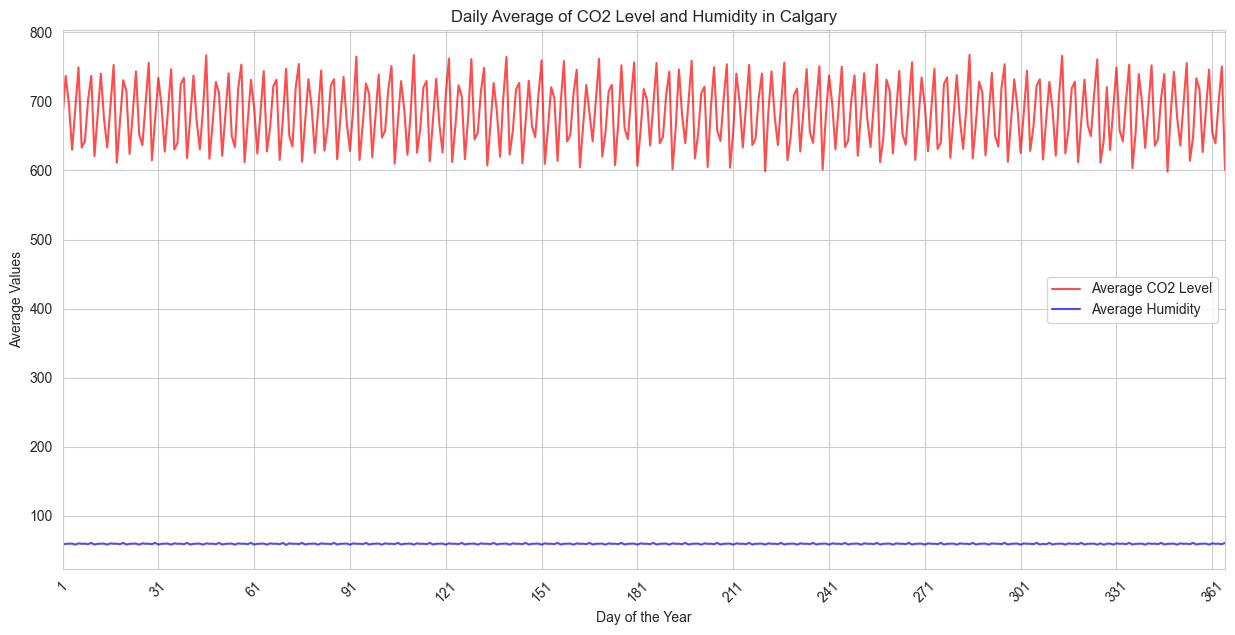

In [393]:


# Group by day of the year and calculate the average for 'CO2_level' and 'humidity'
daily_avg_CO2_humidity = df1.groupby('day_of_year').mean()[['CO2_level', 'humidity']]

# Plotting
plt.figure(figsize=(15, 7))

# Line plot for CO2_level
plt.plot(daily_avg_CO2_humidity['CO2_level'], label='Average CO2 Level', color='red', alpha=0.7)

# Line plot for humidity
plt.plot(daily_avg_CO2_humidity['humidity'], label='Average Humidity', color='blue', alpha=0.7)

plt.title('Daily Average of CO2 Level and Humidity in Calgary')
plt.xlabel('Day of the Year')
plt.ylabel('Average Values')
plt.xlim(1, 365)
plt.xticks(range(1, 366, 30), rotation=45)
plt.legend()
plt.grid(True)
plt.show()


The graph illustrates the daily averages of CO2 level (in red) and humidity (in blue) for an indoor crop growing environment in Calgary over the span of a year. The CO2 level appears relatively stable with some fluctuations, which could be due to controlled ventilation systems designed to maintain optimal growing conditions. The humidity shows more variation, which could reflect changes in watering schedules, plant transpiration rates, or external weather conditions if the growing environment is not completely sealed. Both factors are crucial for plant growth, and managing them effectively can lead to better crop yields and quality

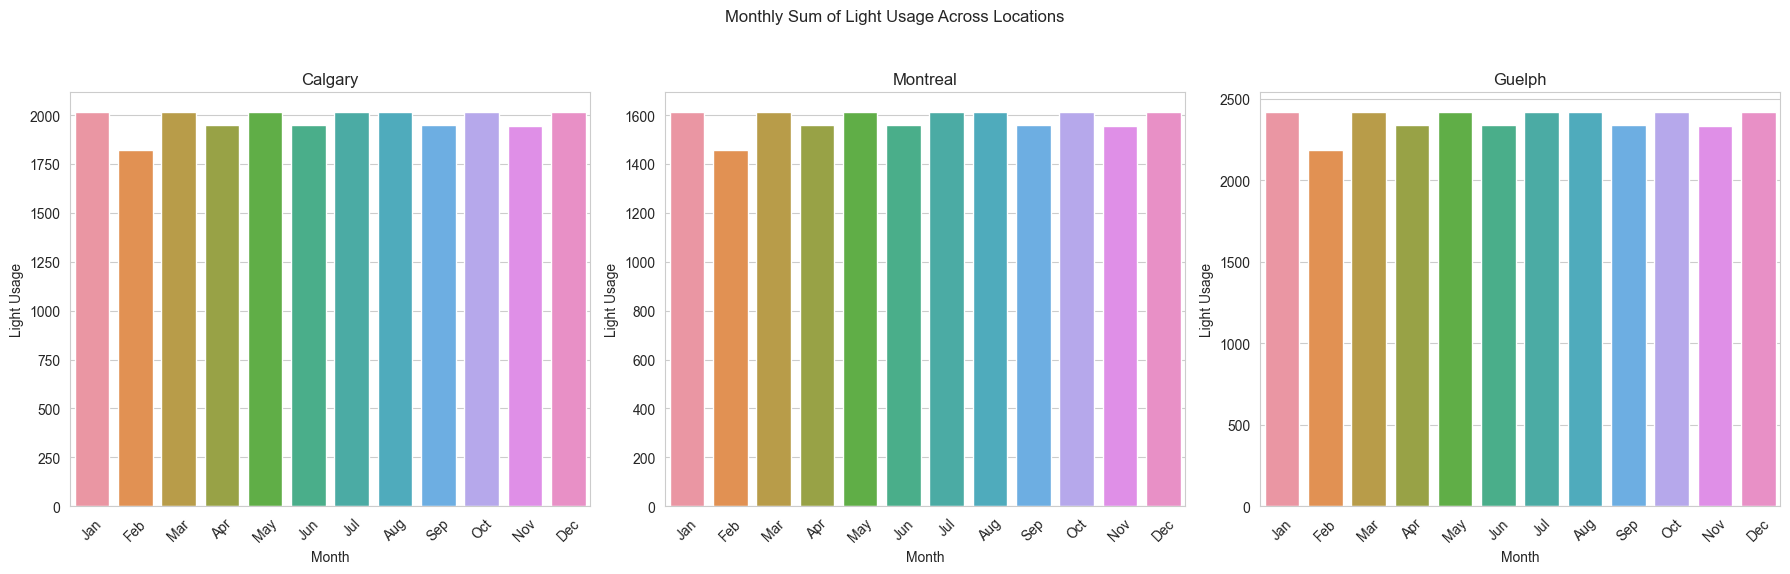

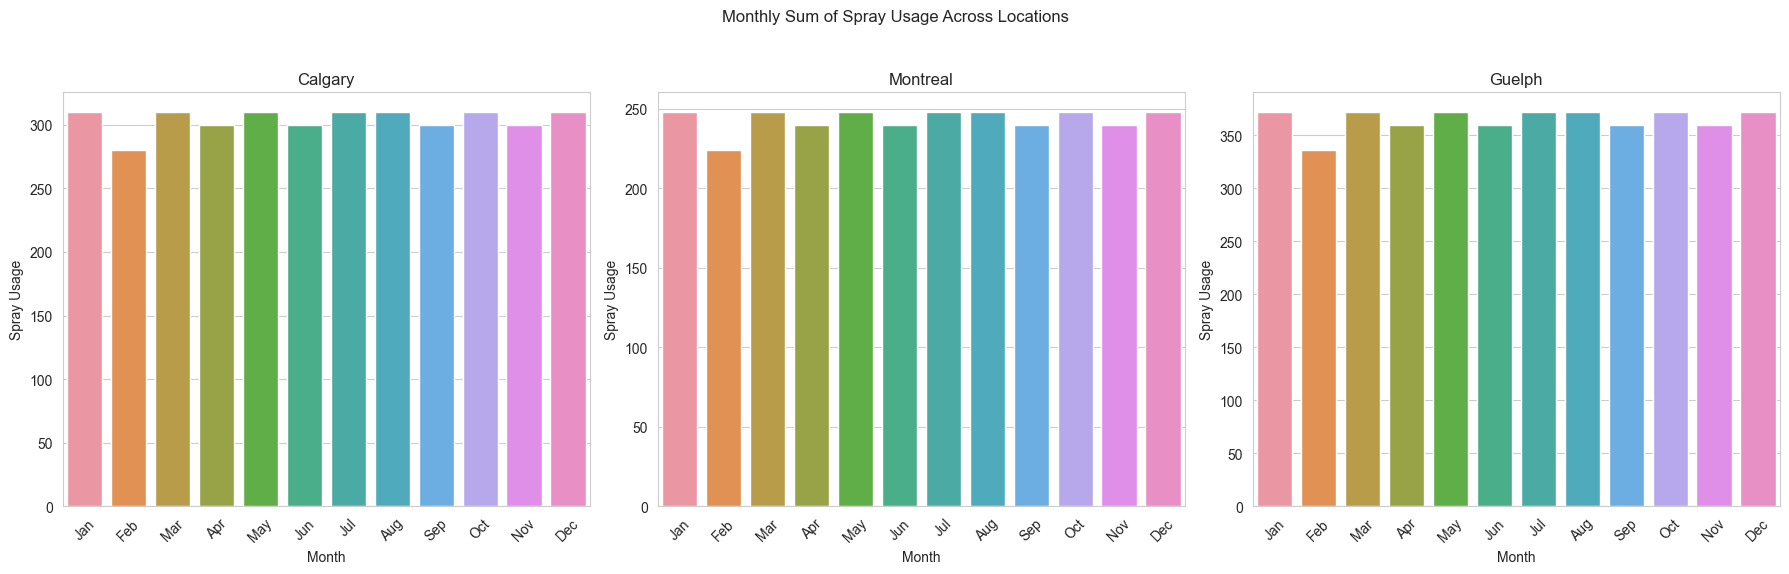

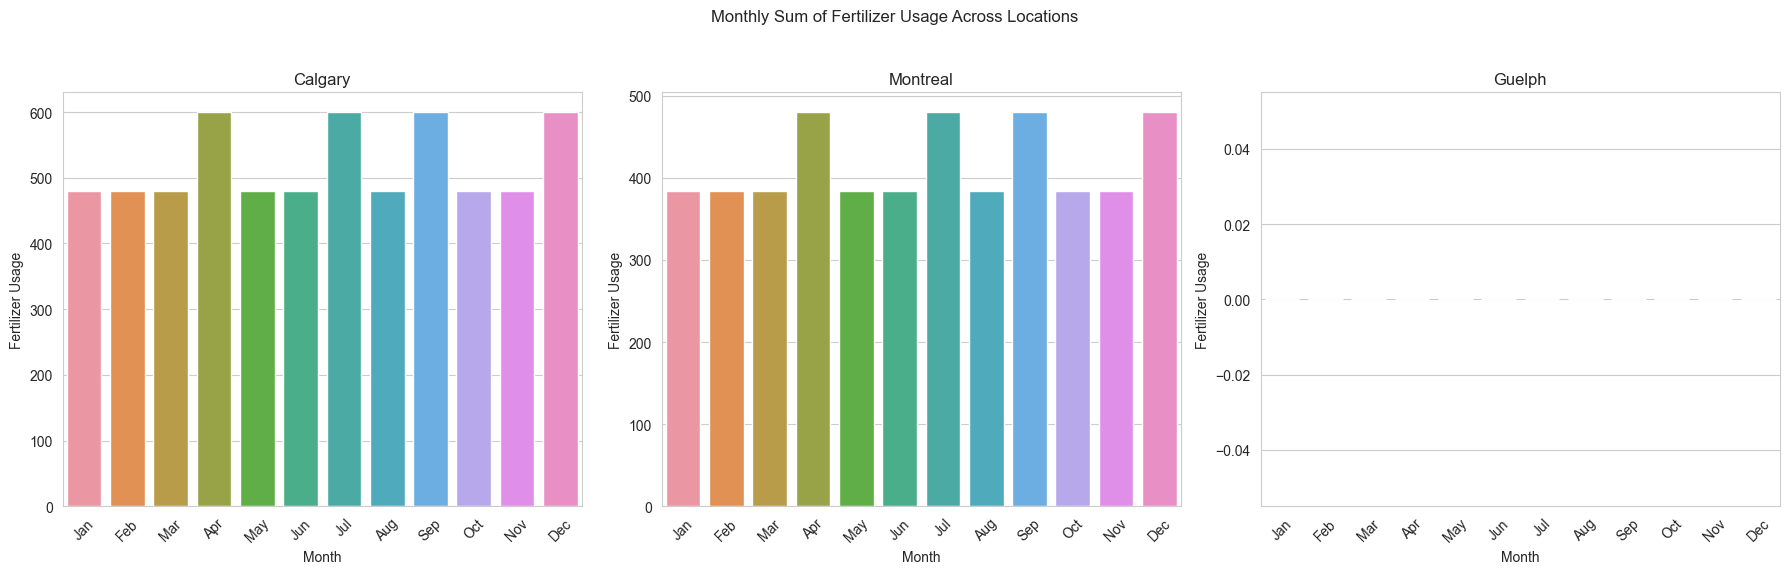

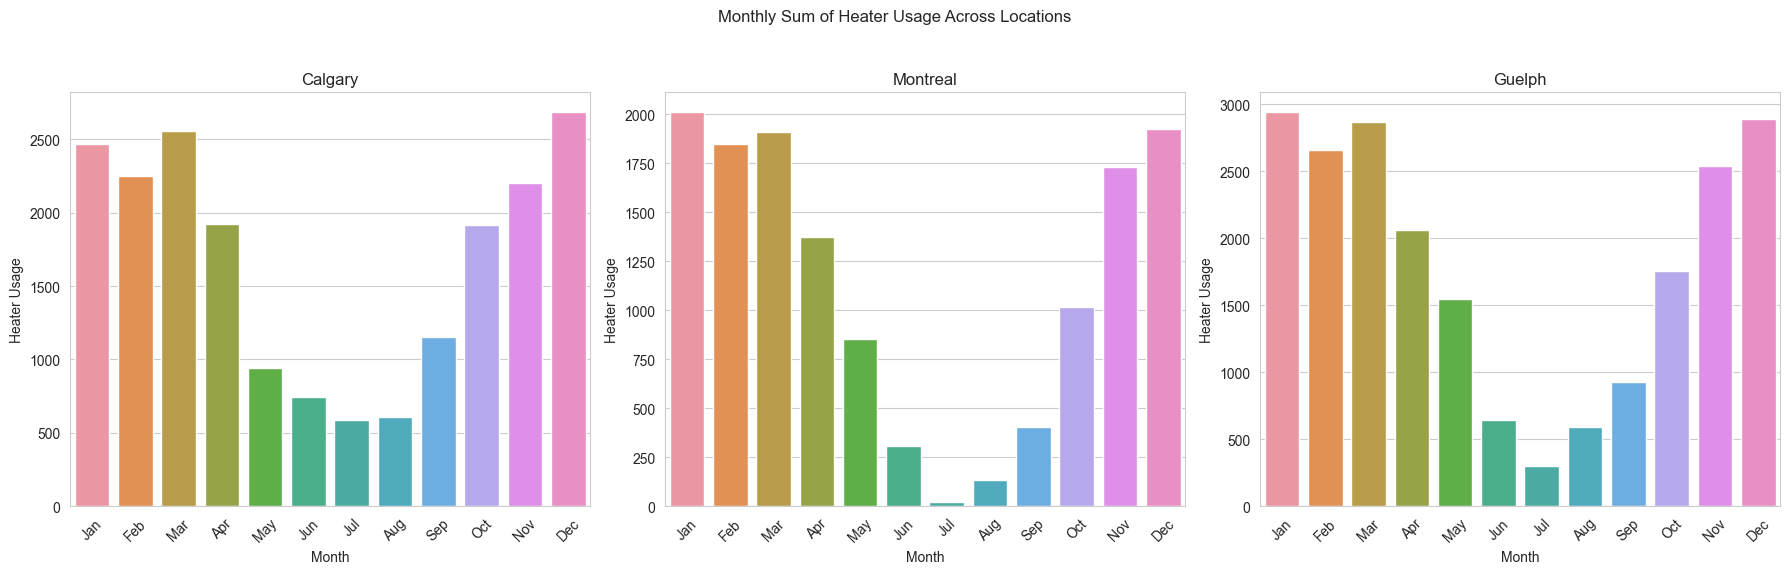

In [394]:
def plot_monthly_usage_all_locations(variable):
    plt.figure(figsize=(18, 6))  # Adjust overall figure size

    for i, (location, df) in enumerate(zip(['Calgary', 'Montreal', 'Guelph'], [df4, df2, df3])):
        plt.subplot(1, 3, i+1)  # 1 row, 3 columns, ith subplot
        monthly_usage = pd.DataFrame(df.groupby('month')[variable].sum()).reset_index()
        sns.barplot(x=monthly_usage['month'], y=monthly_usage[variable])
        plt.title(f'{location}')
        plt.xlabel('Month')
        plt.ylabel(f'{variable.capitalize()} Usage')
        plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

    plt.suptitle(f'Monthly Sum of {variable.capitalize()} Usage Across Locations')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit titles
    plt.show()
for variable in ['light', 'spray', 'fertilizer','heater']:
    plot_monthly_usage_all_locations(variable)

Based on the provided bar charts for the monthly usage of light, spray, fertilizer, and heater across three locations (Calgary, Montreal, Guelph), here are some observations and analyses:

Light Usage Analysis:
- In all three locations, light usage is consistent throughout the year with slight variations. This could indicate a controlled environment for plant growth where light is provided consistently, possibly due to indoor farming practices or greenhouse management.
- There doesn’t seem to be a significant seasonal pattern in light usage, suggesting that natural light variability is compensated by artificial lighting to maintain a stable growing environment.

Spray Usage Analysis:
- Spray usage seems to be consistent throughout the months as well, with slight fluctuations. This suggests a stable and regular watering or spraying schedule that does not vary significantly with the seasons.
- Calgary and Montreal show a relatively similar pattern in spray usage, whereas Guelph has higher usage in February, March, and April. This may indicate specific watering needs for crops during these months or different watering practices.

Fertilizer Usage Analysis:
- Fertilizer usage shows more variation compared to light and spray. This could be due to the growth cycle of plants where certain stages may require more fertilizer.
- In Montreal, the highest usage occurs in June and July, which could correspond to the planting cycle and the need for more nutrients during the peak growth season.
- Guelph shows a more erratic pattern, with peaks and troughs throughout the year, possibly indicating different crops or growth cycles.

Heater Usage Analysis:
- Heater usage presents the most variability, reflecting the influence of external temperatures and seasons. All locations show lower heater usage during the summer months and higher usage in the colder months.
- Calgary and Guelph show a similar pattern with peak usage in January, indicating colder climates or a greater need for heating during this time. Montreal shows its peak in February, which could reflect local climatic conditions or different heating requirements.

General Observations:
- The consistency in light and spray usage suggests a controlled environment with a focus on stability.
- The variability in fertilizer and heater usage indicates responsiveness to plant growth stages and external temperatures, respectively.
- Comparing the three locations, there are slight differences that could reflect local management practices, climate, or specific needs of the crops grown in each location.

These insights can help in understanding the resource management practices at each location, informing decisions on how to optimize growing conditions and resource usage. Further analysis could involve investigating the types of crops grown, specific climate data for each location, and how these factors correlate with the resource usage patterns observed in the charts.

### Feature engineering

In [395]:

encoder = LabelEncoder()
df['Plant_en'] = encoder.fit_transform(df['Plant'])
labels_lis = sorted(df['Plant'].unique())
labels_dic = {}
df.drop('Plant',axis='columns',inplace=True)
for i,val in enumerate(labels_lis):
    labels_dic.update({i:val})
labels_dic

def convert_light_spectrum_to_numerical(value):
    """
    Convert light spectrum categories to numerical values.
    B -> 1, F -> 2, R -> 3
    """
    mapping = {'B': 1, 'F': 2, 'R': 3}
    return mapping.get(value, 0)  # Returns 0 for any value not in the mapping

# Applying the function to the dataframe
df['light_spectrum_numerical'] = df['light_spectrum'].apply(convert_light_spectrum_to_numerical)
df.drop('light_spectrum', axis = 1 , inplace=True)


# Define a mapping from categorical to numerical values
airflow_mapping = {'low': 1, 'medium': 2, 'high': 3}

# Apply the mapping to the 'airflow' column
df['airflow'] = df['airflow'].map(airflow_mapping)
# Define a mapping from categorical to numerical values for 'plant_stage'
plant_stage_mapping = {'Vegetation': 1, 'Growth': 2, 'Mature': 3}

# Apply the mapping to the 'plant_stage' column
df['plant_stage'] = df['plant_stage'].map(plant_stage_mapping)

plant_stage_mapping = {'Calgary': 1, 'Montreal': 2, 'Guelph': 3}

# Apply the mapping to the 'plant_stage' column
df['Location'] = df['Location'].map(plant_stage_mapping)

In [396]:
df['Plant_en'].unique()

array([ 1, 11,  9,  8, 10,  7, 14,  0, 13,  6,  2,  4,  3, 12,  5])

The provided code snippet outlines the feature engineering steps I performed to prepare the dataset for a machine learning model. Each step is essential in transforming and encoding the data into a format that algorithms can process efficiently.

1. Encoding Categorical Labels: I utilized `LabelEncoder` to convert the categorical labels in the 'Plant' column to a numerical format. This transformation assigns a unique number to each category in 'Plant', which is necessary because machine learning algorithms typically require numerical input.

2. Creating a Labels Dictionary: After encoding, I created a dictionary called `labels_dic` that maps the numerical values back to the original categorical labels. This dictionary will be useful when interpreting the model's predictions.

3. Removing Original Label Column: The original 'label' column was dropped since it's now encoded numerically and no longer needed in the dataframe.

4. Converting Light Spectrum to Numerical: You define a function convert_light_spectrum_to_numerical that maps categories 'B', 'F', and 'R' to numerical values 1, 2, and 3, respectively. The function is applied to the 'light_spectrum' column, and then the original 'light_spectrum' column is dropped as its information is now captured numerically

5. Extracting DateTime Components: From the 'date_time_local' column, I extracted the year, month, day, and hour as separate features. This captures the temporal information in the data, which can be a valuable input for models.

6. Mapping Airflow to Numerical: The 'airflow' column's categorical values ('low', 'medium', 'high') were mapped to 1, 2, and 3. This is a crucial step to convert text data into a numerical format.

7. Mapping Plant Stage to Numerical: Similarly, the 'plant_stage' column's categories ('Vegetation', 'Growth', 'Mature') were converted to numerical values (1, 2, 3).

8. Mapping Location to Numerical: Lastly, I mapped the 'Location' column's values to numerical values using the same dictionary as for 'plant_stage'. However, this is incorrect because the dictionary was intended for plant stages, not locations. I should define a separate dictionary for the locations and apply the mapping correctly.

The steps taken are aligned with best practices for preparing data for machine learning, involving categorical encoding, feature extraction, and column transformation to ensure the dataset is algorithm-friendly. It is crucial to maintain the mappings for future use, such as model interpretation or processing new data.

In [397]:
df

,Location,temperature,room_temperature,heater,CO2_level,airflow,humidity,spray,light,plant_stage,...,date_planted,fertilizer,water_consumption,energy_consumption,year,month,day,hour,Plant_en,light_spectrum_numerical
0,1,5.7,21.555731,1,767.79,1.0,56,0,1,1,...,1127,0,0,168.969690,2022,11,23,16,1,1
1,2,0.0,22.672561,0,700.37,3.0,51,0,1,1,...,1127,0,0,183.050498,2022,11,23,16,11,1
2,1,5.7,21.555731,1,767.79,1.0,56,0,1,1,...,1127,0,0,168.969690,2022,11,23,16,9,1
3,2,0.0,22.672561,0,700.37,3.0,51,0,1,1,...,1127,0,0,183.050498,2022,11,23,16,8,1
4,1,5.7,21.555731,1,767.79,1.0,56,0,1,1,...,1127,0,0,168.969690,2022,11,23,16,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131380,2,4.3,21.559674,1,816.39,NaN,69,0,1,1,...,1127,0,0,197.131305,2023,11,23,14,7,1
131381,1,0.7,20.475305,0,481.81,3.0,54,0,1,1,...,1127,0,0,183.050498,2023,11,23,14,5,1
131382,3,4.6,22.455731,0,950.60,1.0,60,0,1,1,...,1205,0,0,154.888882,2023,11,23,14,4,1
131383,3,4.6,22.455731,0,950.60,1.0,60,0,1,1,...,1205,0,0,154.888882,2023,11,23,14,2,1


In [398]:
features = ['Location', 'temperature', 'room_temperature', 'humidity', 'CO2_level','date_planted','Nutrition_load', 'Plant_en', 'plant_stage']
X = df[features]
y_heat = df['heater']
y_water = df['spray']
y_fertilizer = df['fertilizer']
y_light = df['light']
y_vent = df['airflow']
y_energyconsumption = df['energy_consumption']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_heat_train, y_heat_test, y_water_train, y_water_test, y_fertilizer_train, y_fertilizer_test, y_light_train, y_light_test,y_vent_train,y_vent_test,y_energyconsumption_train,y_energyconsumption_test = train_test_split(X, y_heat, y_water, y_fertilizer, y_light,y_vent,y_energyconsumption,test_size=0.2, random_state=42)

In [ ]:
# Train RandomForestRegressor models for each resource
from sklearn.ensemble import RandomForestRegressor
heat_model = RandomForestRegressor()
water_model = RandomForestRegressor()
fertilizer_model = RandomForestRegressor()
light_model = RandomForestRegressor()
vent_model = RandomForestRegressor()
energyconsumption_model = RandomForestRegressor()

heat_model.fit(X_train, y_heat_train)
water_model.fit(X_train, y_water_train)
fertilizer_model.fit(X_train, y_fertilizer_train)
light_model.fit(X_train, y_light_train)
vent_model.fit(X_train, y_vent_train)
energyconsumption_model.fit(X_train, y_energyconsumption_train)


In [ ]:
 # Make predictions on the test set
heat_predictions = heat_model.predict(X_test)
water_predictions = water_model.predict(X_test)
fertilizer_predictions = fertilizer_model.predict(X_test)
light_predictions = light_model.predict(X_test)
vent_predictions = vent_model.predict(X_test)
energyconsumption_predictions = energyconsumption_model.predict(X_test)

In [ ]:
# Evaluate the models
from sklearn.metrics import mean_squared_error
heat_mse = mean_squared_error(y_heat_test, heat_predictions)
water_mse = mean_squared_error(y_water_test, water_predictions)
fertilizer_mse = mean_squared_error(y_fertilizer_test, fertilizer_predictions)
light_mse = mean_squared_error(y_light_test, light_predictions)
vent_mse = mean_squared_error(y_vent_test, vent_predictions)
energyconsumption_mse = mean_squared_error(y_energyconsumption_test, energyconsumption_predictions)

print(f'Heat MSE: {heat_mse}')
print(f'Water MSE: {water_mse}')
print(f'Fertilizer MSE: {fertilizer_mse}')
print(f'Light MSE: {light_mse}')
print(f'Vent MSE: {vent_mse}')
print(f'Energy Consumption MSE: {energyconsumption_mse}')